In [1]:
import pandas as pd
import numpy as np

In [2]:
original = pd.read_excel("Reduced Features for TAI project.xlsx")

In [3]:
original

,Patient ID,original_shape_Elongation,original_firstorder_Kurtosis,original_firstorder_Skewness,wavelet-LHL_glrlm_RunVariance,wavelet2-LHL_gldm_LargeDependenceEmphasis,wavelet2-LLH_gldm_LargeDependenceEmphasis,wavelet-LHL_gldm_LargeDependenceEmphasis,wavelet2-LHL_gldm_DependenceVariance,wavelet2-LHL_glrlm_RunVariance,...,wavelet-LLL_glszm_LargeAreaLowGrayLevelEmphasis,wavelet2-HHH_firstorder_RootMeanSquared,wavelet2-LLH_firstorder_Kurtosis,wavelet-HHL_glcm_Imc2,wavelet2-LHH_firstorder_RobustMeanAbsoluteDeviation,original_shape_SphericalDisproportion,wavelet2-HHL_glcm_Idmn,wavelet2-LHH_firstorder_RootMeanSquared,wavelet2-HLL_firstorder_Maximum,Label
0,1,0.661690,2.817688,0.769536,7.257078,3381.734540,3715.077716,3546.818663,634.748331,6.682128,...,4005.210235,0.408974,2.949406,0.231474,0.473838,1.572473,0.983853,0.875074,142.866201,0
1,1,0.750849,2.084800,0.442780,3.137745,2653.808184,1443.697357,2297.305200,616.359443,4.095513,...,32.058217,0.282009,2.790798,0.010531,0.401979,1.178144,0.905124,0.696716,21.693040,0
2,1,0.619781,2.590759,0.384512,7.005413,3551.125894,3568.780890,3342.865490,426.661231,8.535867,...,63032.030205,0.442902,3.211156,0.276207,0.446076,1.615550,0.993054,0.832938,163.039718,0
3,2,0.388733,2.932863,0.738215,2.178815,1564.039548,1370.065913,1839.930320,318.122386,1.939531,...,147.649047,0.330143,3.054401,0.023870,0.399957,1.306885,0.911141,0.727764,22.979554,0
4,2,0.820531,2.814081,0.773252,1.316850,1377.981413,1005.602230,1164.799257,325.473446,1.726775,...,65.872763,0.278449,2.074076,0.016973,0.350459,1.165727,0.906515,0.606753,24.490320,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3557,96,0.225097,3.145095,0.887252,0.507042,113.521739,63.289855,158.304348,21.194707,0.420766,...,22.156250,0.148424,2.383944,0.025038,0.236198,1.412431,0.924402,0.649229,27.270149,1
3558,96,0.503842,2.484876,0.655281,4.641217,2475.349595,2771.461923,2684.326511,574.123960,4.591888,...,450.172765,0.403421,3.311709,0.546492,0.400437,1.494975,0.992242,0.734152,288.610250,1
3559,96,0.454726,3.363199,1.026167,6.014596,3310.430153,1430.379898,3536.925043,548.184562,5.595325,...,336.564815,0.114790,3.124013,0.028680,0.319474,1.609656,0.895515,0.566488,14.823064,1
3560,96,0.624101,2.205947,0.349004,1.626775,921.056338,280.690141,1045.957746,148.842690,1.583895,...,14.416448,0.131801,2.174953,0.072674,0.254557,1.280580,0.895171,0.542009,15.171972,1


In [4]:
original.isna().sum().sum() 

0

In [5]:
original = original.T.drop_duplicates().T

The dataset has no NAN values.

In [6]:
original["Patient ID"][0]

1.0

In [7]:
print(original["Patient ID"].value_counts())

34.0    342
9.0     141
36.0    138
71.0    132
42.0    129
       ... 
95.0      3
1.0       3
91.0      2
87.0      1
81.0      1
Name: Patient ID, Length: 96, dtype: int64


Some partients have the same rows as the test part. 

We notice here that some patients have alot of data compared to other patients. For example patient number '34' has 342 rows of data whereas patient '81' has only 1 row of data. So we need to balance the data.

We can see that the data from the 96 patients is balanced (46 Negative cases to 50 Negative cases)

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

In [9]:
neg = []
pos = []

for i in range(len(original)):
    if original["Label"][i] == 0:
        neg.append(original.iloc[i])
    else:
        pos.append(original.iloc[i])

In [10]:
dfneg = pd.DataFrame(neg)

In [11]:
dfneg[["Patient ID", "Label"]] = dfneg[["Patient ID", "Label"]].astype(int)

In [12]:
dfneg

,Patient ID,original_shape_Elongation,original_firstorder_Kurtosis,original_firstorder_Skewness,wavelet-LHL_glrlm_RunVariance,wavelet2-LHL_gldm_LargeDependenceEmphasis,wavelet2-LLH_gldm_LargeDependenceEmphasis,wavelet-LHL_gldm_LargeDependenceEmphasis,wavelet2-LHL_gldm_DependenceVariance,wavelet2-LHL_glrlm_RunVariance,...,wavelet-LLL_glszm_LargeAreaLowGrayLevelEmphasis,wavelet2-HHH_firstorder_RootMeanSquared,wavelet2-LLH_firstorder_Kurtosis,wavelet-HHL_glcm_Imc2,wavelet2-LHH_firstorder_RobustMeanAbsoluteDeviation,original_shape_SphericalDisproportion,wavelet2-HHL_glcm_Idmn,wavelet2-LHH_firstorder_RootMeanSquared,wavelet2-HLL_firstorder_Maximum,Label
0,1,0.661690,2.817688,0.769536,7.257078,3381.734540,3715.077716,3546.818663,634.748331,6.682128,...,4005.210235,0.408974,2.949406,0.231474,0.473838,1.572473,0.983853,0.875074,142.866201,0
1,1,0.750849,2.084800,0.442780,3.137745,2653.808184,1443.697357,2297.305200,616.359443,4.095513,...,32.058217,0.282009,2.790798,0.010531,0.401979,1.178144,0.905124,0.696716,21.693040,0
2,1,0.619781,2.590759,0.384512,7.005413,3551.125894,3568.780890,3342.865490,426.661231,8.535867,...,63032.030205,0.442902,3.211156,0.276207,0.446076,1.615550,0.993054,0.832938,163.039718,0
3,2,0.388733,2.932863,0.738215,2.178815,1564.039548,1370.065913,1839.930320,318.122386,1.939531,...,147.649047,0.330143,3.054401,0.023870,0.399957,1.306885,0.911141,0.727764,22.979554,0
4,2,0.820531,2.814081,0.773252,1.316850,1377.981413,1005.602230,1164.799257,325.473446,1.726775,...,65.872763,0.278449,2.074076,0.016973,0.350459,1.165727,0.906515,0.606753,24.490320,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015,46,0.577087,2.603525,0.710759,6.556231,2896.170217,2142.948016,3388.937854,485.392841,5.569620,...,220.845578,0.146085,3.380679,0.036039,0.370779,1.402542,0.895293,0.667424,21.795029,0
2016,46,0.907373,1.822670,0.173061,7.887598,3628.381862,2428.119023,3596.726294,533.588966,9.443781,...,10.746221,0.157173,3.605559,0.048991,0.390818,2.006712,0.892271,0.702332,25.016651,0
2017,46,0.642163,2.459737,0.688368,0.654063,87.486486,144.351351,271.000000,8.420745,0.407397,...,5.858770,0.395420,2.430561,0.070254,0.156133,1.148375,0.983085,1.055117,110.600405,0
2018,46,0.680525,2.152316,0.495054,5.743015,3055.746041,2036.252786,3182.018573,605.873446,5.728189,...,1.439775,0.249950,3.498572,0.075893,0.326827,1.203721,0.907640,0.599508,34.910723,0


In [13]:
dfpos = pd.DataFrame(pos)
dfpos[["Patient ID", "Label"]] = dfpos[["Patient ID", "Label"]].astype(int)

In [14]:
dfpos

,Patient ID,original_shape_Elongation,original_firstorder_Kurtosis,original_firstorder_Skewness,wavelet-LHL_glrlm_RunVariance,wavelet2-LHL_gldm_LargeDependenceEmphasis,wavelet2-LLH_gldm_LargeDependenceEmphasis,wavelet-LHL_gldm_LargeDependenceEmphasis,wavelet2-LHL_gldm_DependenceVariance,wavelet2-LHL_glrlm_RunVariance,...,wavelet-LLL_glszm_LargeAreaLowGrayLevelEmphasis,wavelet2-HHH_firstorder_RootMeanSquared,wavelet2-LLH_firstorder_Kurtosis,wavelet-HHL_glcm_Imc2,wavelet2-LHH_firstorder_RobustMeanAbsoluteDeviation,original_shape_SphericalDisproportion,wavelet2-HHL_glcm_Idmn,wavelet2-LHH_firstorder_RootMeanSquared,wavelet2-HLL_firstorder_Maximum,Label
2020,47,0.416225,2.521806,0.439906,0.533505,138.849057,90.132075,187.377358,26.008544,0.529860,...,49.375000,0.118690,2.362302,0.038090,0.167263,1.279397,0.895734,0.377417,18.605135,1
2021,47,0.736010,2.173015,0.483420,0.552986,166.500000,63.500000,185.642857,10.250000,0.521358,...,6.466722,0.403556,2.315923,0.019693,0.824728,1.058369,0.943474,2.449881,52.971706,1
2022,47,0.641362,3.087188,0.909156,0.956684,241.235294,251.742081,587.461538,47.635143,0.500438,...,20.771146,0.610023,3.151656,0.093560,1.928797,1.295517,0.944976,3.136327,71.439527,1
2023,47,0.664107,3.407474,1.054132,2.226909,631.497549,116.884804,1560.713235,163.114595,1.015119,...,0.345548,0.151758,3.259447,0.032884,0.546592,1.289721,0.908851,1.109485,56.191556,1
2024,47,0.849858,2.284232,0.410488,18.573472,3579.715899,3939.033036,4893.125788,526.151309,8.866858,...,748.787596,0.377844,3.885238,0.157732,0.364693,1.416575,0.981349,0.644504,97.866878,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3557,96,0.225097,3.145095,0.887252,0.507042,113.521739,63.289855,158.304348,21.194707,0.420766,...,22.156250,0.148424,2.383944,0.025038,0.236198,1.412431,0.924402,0.649229,27.270149,1
3558,96,0.503842,2.484876,0.655281,4.641217,2475.349595,2771.461923,2684.326511,574.123960,4.591888,...,450.172765,0.403421,3.311709,0.546492,0.400437,1.494975,0.992242,0.734152,288.610250,1
3559,96,0.454726,3.363199,1.026167,6.014596,3310.430153,1430.379898,3536.925043,548.184562,5.595325,...,336.564815,0.114790,3.124013,0.028680,0.319474,1.609656,0.895515,0.566488,14.823064,1
3560,96,0.624101,2.205947,0.349004,1.626775,921.056338,280.690141,1045.957746,148.842690,1.583895,...,14.416448,0.131801,2.174953,0.072674,0.254557,1.280580,0.895171,0.542009,15.171972,1


In [15]:
from sklearn.model_selection import GroupShuffleSplit 

In [16]:
splitter = GroupShuffleSplit(test_size=0.33, n_splits=2, random_state = 7)
splitp = splitter.split(dfpos, groups=dfpos['Patient ID'])
train_indsp, test_indsp = next(splitp)
train_pos = dfpos.iloc[train_indsp]
test_pos = dfpos.iloc[test_indsp]

In [17]:
splitn = splitter.split(dfneg, groups=dfneg['Patient ID'])
train_indsn, test_indsn = next(splitn)
train_neg = dfneg.iloc[train_indsn]
test_neg = dfneg.iloc[test_indsn]

In [18]:
train_data = pd.concat([train_neg, train_pos])
test_data = pd.concat([test_neg, test_pos])

In [19]:
train_labels = train_data["Label"]
test_labels = test_data["Label"]

In [20]:
train_data = train_data.drop(columns=["Patient ID", "Label"])
test_data = test_data.drop(columns=["Patient ID", "Label"])

In [21]:
X_val, X_test, y_val, y_test = train_test_split(test_data, test_labels, test_size=0.5)

In [22]:
print(f"{len(train_data)} for training")
print(f"{len(X_val)} for validating")
print(f"{len(X_test)} for testing")

2252 for training
655 for validating
655 for testing


# SVM / SVC

In [23]:
clf = svm.SVC(kernel='linear', gamma='auto', probability=True)
pipe = Pipeline([('scaler', StandardScaler()), ('svc', clf)])

In [24]:
pipe.fit(train_data, train_labels)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svc', SVC(gamma='auto', kernel='linear', probability=True))])

In [25]:
y_pred_svm_proba = pipe.predict_proba(X_test)[:, 1]
y_pred_svm = pipe.predict(X_test)

In [26]:
confusion_matrix(y_test, y_pred_svm)

array([[362,  48],
       [ 69, 176]], dtype=int64)

In [27]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_svm))
print("Precision:",metrics.precision_score(y_test, y_pred_svm))
print("Recall:",metrics.recall_score(y_test, y_pred_svm))

Accuracy: 0.8213740458015267
Precision: 0.7857142857142857
Recall: 0.7183673469387755


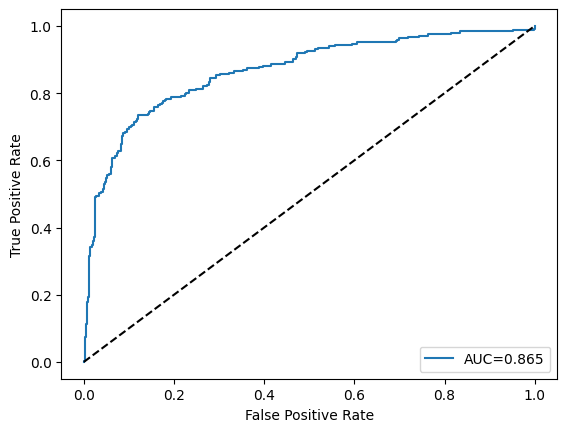

<Figure size 700x500 with 0 Axes>

In [28]:
auc = metrics.roc_auc_score(y_test, y_pred_svm_proba)
auc = "{:.3f}".format(auc)
fprSVC, tprSVC, _ = metrics.roc_curve(y_test, y_pred_svm_proba)
plt.plot(fprSVC, tprSVC, label="AUC="+ auc)
plt.plot([0,1],[0,1], 'k--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.rcParams["figure.figsize"] = (7,5)
plt.show()
plt.savefig('img/svm_svc.png')

In [29]:
print(classification_report(y_test, y_pred_svm, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       410
           1       0.79      0.72      0.75       245

    accuracy                           0.82       655
   macro avg       0.81      0.80      0.81       655
weighted avg       0.82      0.82      0.82       655



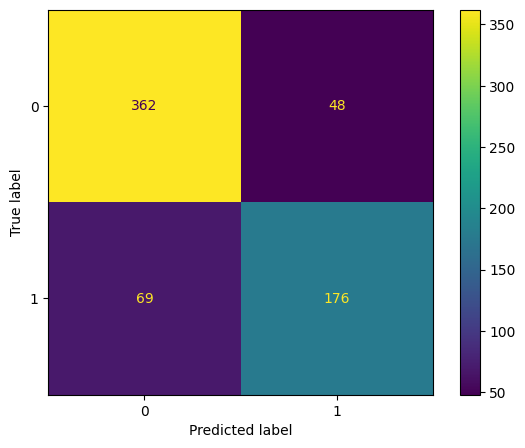

In [30]:
cm = confusion_matrix(y_test, y_pred_svm,  labels=[0,1])
mat = ConfusionMatrixDisplay(confusion_matrix=cm)
mat.plot()

In [31]:
kf = KFold(n_splits=5)

# We fuse the training and validation set together
X_trainval = np.concatenate((train_data, X_val))
y_trainval = np.concatenate((train_labels, y_val))

# Lists to save the losses
train_mses = []
val_mses = []

# loop through the different folds
for train_indexes, val_indexes in kf.split(X_trainval):
    # create an new linreg model, untrained
    clf = svm.SVC(kernel='linear', gamma='auto', probability=True)
    pipe = Pipeline([('scaler', StandardScaler()), ('svc', clf)])
    # train the model on a subset of the training data
    pipe.fit(X_trainval[train_indexes], y_trainval[train_indexes])
    
    # make prediction for training and validation dataset
    y_hat_train_temp = pipe.predict(X_trainval[train_indexes])
    y_hat_val_temp = pipe.predict(X_trainval[val_indexes])
    
    # compute the losses
    mse_train_temp = np.mean((y_hat_train_temp - y_trainval[train_indexes]) ** 2)
    mse_val_temp = np.mean((y_hat_val_temp - y_trainval[val_indexes]) ** 2)
    
    # append the loss values to the lists
    train_mses.append(mse_train_temp)
    val_mses.append(mse_val_temp)
    
print(f"Mean training loss: {round(np.mean(train_mses), 3)} std: {round(np.std(train_mses), 3)}")
print(f"Mean validation loss: {round(np.mean(val_mses), 3)} std: {round(np.std(val_mses), 3)}")

Mean training loss: 0.213 std: 0.046
Mean validation loss: 0.37 std: 0.18


# XGBOOST

In [32]:
model = XGBClassifier(random_state=42, n_estimators=35, booster='gblinear')
pipe = Pipeline([('scl', StandardScaler()),('xgb', model)])
pipe.fit(train_data, train_labels)
y_predxg = pipe.predict(X_test)
y_predxg_proba = pipe.predict_proba(X_test)[:, 1]

In [33]:
print("Accuracy:",metrics.accuracy_score(y_test, y_predxg))
print("Precision:",metrics.precision_score(y_test, y_predxg))
print("Recall:",metrics.recall_score(y_test, y_predxg))

Accuracy: 0.8229007633587786
Precision: 0.7676348547717843
Recall: 0.7551020408163265


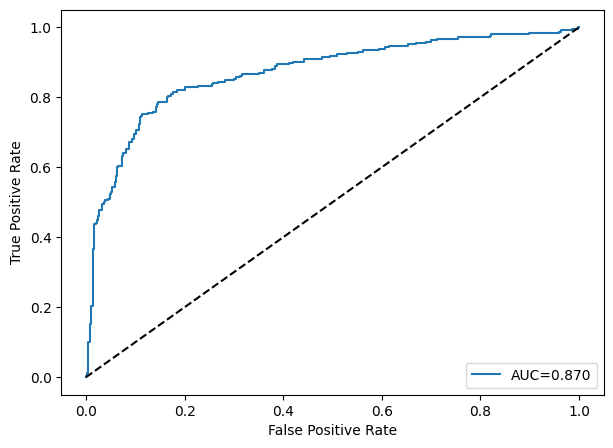

<Figure size 700x500 with 0 Axes>

In [34]:
auc = metrics.roc_auc_score(y_test, y_predxg_proba)
auc = "{:.3f}".format(auc)
fprXGB, tprXGB, _ = metrics.roc_curve(y_test, y_predxg_proba)
plt.plot(fprXGB, tprXGB, label="AUC="+ auc)
plt.plot([0,1],[0,1], 'k--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.rcParams["figure.figsize"] = (7,5)
plt.show()
plt.savefig('img/xgb.png')

In [35]:
print(classification_report(y_test, y_predxg, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       410
           1       0.77      0.76      0.76       245

    accuracy                           0.82       655
   macro avg       0.81      0.81      0.81       655
weighted avg       0.82      0.82      0.82       655



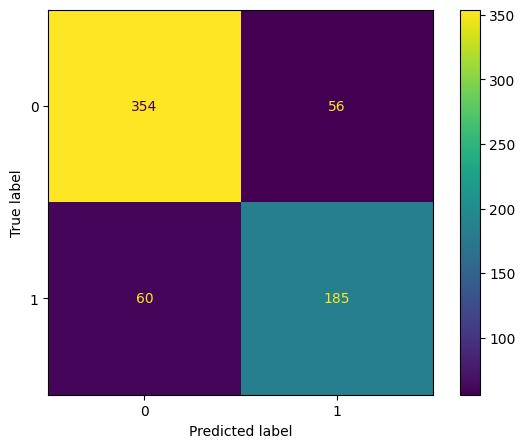

In [36]:
cm = confusion_matrix(y_test, y_predxg,  labels=[0,1])
mat = ConfusionMatrixDisplay(confusion_matrix=cm)
mat.plot()

In [37]:
kf = KFold(n_splits=5)

# We fuse the training and validation set together
X_trainval = np.concatenate((train_data, X_val))
y_trainval = np.concatenate((train_labels, y_val))

# Lists to save the losses
train_mses = []
val_mses = []

# loop through the different folds
for train_indexes, val_indexes in kf.split(X_trainval):
    # create an new linreg model, untrained
    model = XGBClassifier(random_state=42, n_estimators=30, booster='gblinear')
    pipe = Pipeline([('scl', StandardScaler()),('xgb', model)])
    pipe.fit(train_data.values, train_labels.values)
    
    # make prediction for training and validation dataset
    y_hat_train_temp = pipe.predict(X_trainval[train_indexes])
    y_hat_val_temp = pipe.predict(X_trainval[val_indexes])
    
    # compute the losses
    mse_train_temp = np.mean((y_hat_train_temp - y_trainval[train_indexes]) ** 2)
    mse_val_temp = np.mean((y_hat_val_temp - y_trainval[val_indexes]) ** 2)
    
    # append the loss values to the lists
    train_mses.append(mse_train_temp)
    val_mses.append(mse_val_temp)
    
print(f"Mean training loss: {round(np.mean(train_mses), 3)} std: {round(np.std(train_mses), 3)}")
print(f"Mean validation loss: {round(np.mean(val_mses), 3)} std: {round(np.std(val_mses), 3)}")

Mean training loss: 0.322 std: 0.122
Mean validation loss: 0.21 std: 0.161


# Logistic Regression

In [38]:
model = LogisticRegression(max_iter = 1000)
pipe = Pipeline([("preprocessor", RobustScaler()),('logReg', model)])
pipe.fit(train_data, train_labels)
y_predlr = pipe.predict(X_test)
y_predlr_proba = pipe.predict_proba(X_test)[:, 1]

In [39]:
print("Accuracy:",metrics.accuracy_score(y_test, y_predlr))
print("Precision:",metrics.precision_score(y_test, y_predlr))
print("Recall:",metrics.recall_score(y_test, y_predlr))

Accuracy: 0.8259541984732824
Precision: 0.7651821862348178
Recall: 0.7714285714285715


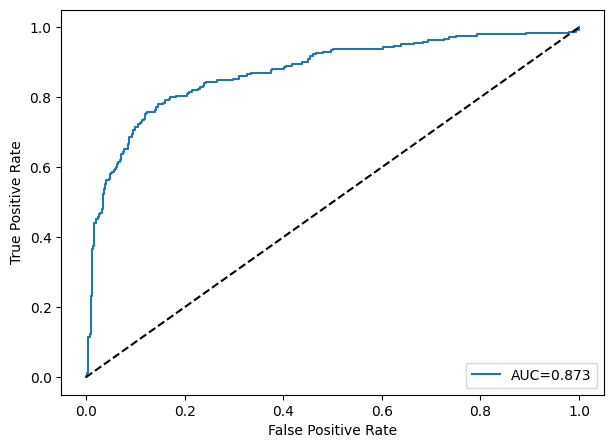

<Figure size 700x500 with 0 Axes>

In [40]:
auc = metrics.roc_auc_score(y_test, y_predlr_proba)
auc = "{:.3f}".format(auc)
fprLR, tprLR, _ = metrics.roc_curve(y_test, y_predlr_proba)
plt.plot(fprLR, tprLR, label="AUC="+ auc)
plt.plot([0,1],[0,1], 'k--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.rcParams["figure.figsize"] = (7,5)
plt.show()
plt.savefig('img/logreg.png')

In [41]:
print(classification_report(y_test, y_predlr, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       410
           1       0.77      0.77      0.77       245

    accuracy                           0.83       655
   macro avg       0.81      0.81      0.81       655
weighted avg       0.83      0.83      0.83       655



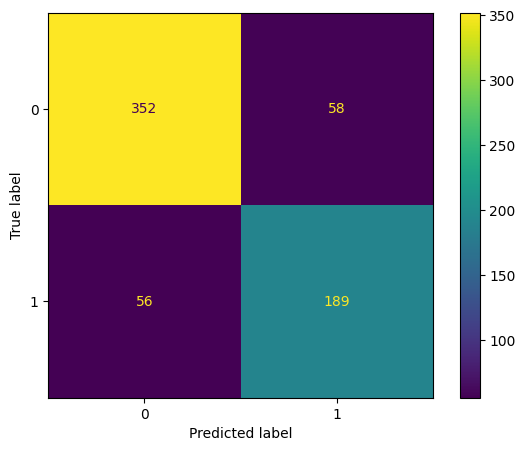

In [42]:
cm = confusion_matrix(y_test, y_predlr)
mat = ConfusionMatrixDisplay(confusion_matrix=cm)
mat.plot()

In [43]:
kf = KFold(n_splits=5)

# We fuse the training and validation set together
X_trainval = np.concatenate((train_data, X_val))
y_trainval = np.concatenate((train_labels, y_val))

# Lists to save the losses
train_mses = []
val_mses = []

# loop through the different folds
for train_indexes, val_indexes in kf.split(X_trainval):
    # create an new linreg model, untrained
    model = LogisticRegression(max_iter = 10000)
    pipe = Pipeline([("preprocessor", RobustScaler()),('logReg', model)])
    # train the model on a subset of the training data
    pipe.fit(X_trainval[train_indexes], y_trainval[train_indexes])
    
    # make prediction for training and validation dataset
    y_hat_train_temp = pipe.predict(X_trainval[train_indexes])
    y_hat_val_temp = pipe.predict(X_trainval[val_indexes])
    
    # compute the losses
    mse_train_temp = np.mean((y_hat_train_temp - y_trainval[train_indexes]) ** 2)
    mse_val_temp = np.mean((y_hat_val_temp - y_trainval[val_indexes]) ** 2)
    
    # append the loss values to the lists
    train_mses.append(mse_train_temp)
    val_mses.append(mse_val_temp)
    
print(f"Mean training loss: {round(np.mean(train_mses), 3)} std: {round(np.std(train_mses), 3)}")
print(f"Mean validation loss: {round(np.mean(val_mses), 3)} std: {round(np.std(val_mses), 3)}")

Mean training loss: 0.225 std: 0.049
Mean validation loss: 0.387 std: 0.176


# Bagging

In [44]:
bagging = BaggingClassifier(n_estimators=35, random_state=42)
pipe = Pipeline([("std", StandardScaler()), ('baggC', bagging)])
pipe.fit(train_data, train_labels)
y_pred_bc = pipe.predict(X_test)
y_pred_bc_proba = pipe.predict_proba(X_test)[:, 1]

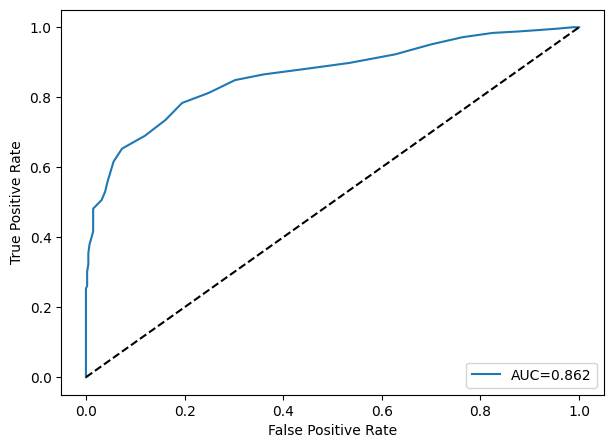

<Figure size 700x500 with 0 Axes>

In [45]:
auc = metrics.roc_auc_score(y_test, y_pred_bc_proba)
auc = "{:.3f}".format(auc)
fprBAGGING, tprBAGGING, _ = metrics.roc_curve(y_test, y_pred_bc_proba)
plt.plot(fprBAGGING, tprBAGGING, label="AUC="+ auc)
plt.plot([0,1],[0,1], 'k--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()
plt.savefig('img/bagging.png')

In [46]:
print(classification_report(y_test, y_pred_bc))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       410
           1       0.78      0.69      0.73       245

    accuracy                           0.81       655
   macro avg       0.80      0.79      0.79       655
weighted avg       0.81      0.81      0.81       655



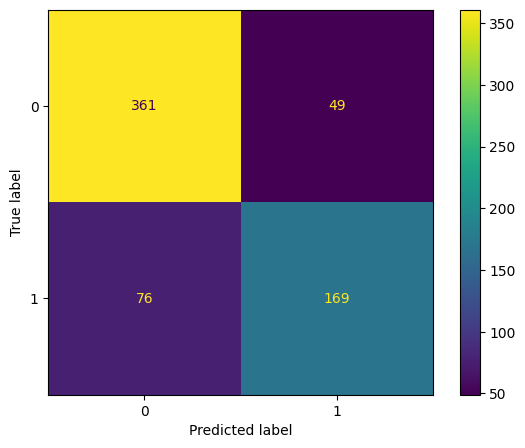

In [47]:
cm = confusion_matrix(y_test, y_pred_bc)
mat = ConfusionMatrixDisplay(confusion_matrix=cm)
mat.plot()

In [48]:
kf = KFold(n_splits=5)

# We fuse the training and validation set together
X_trainval = np.concatenate((train_data, X_val))
y_trainval = np.concatenate((train_labels, y_val))

# Lists to save the losses
train_mses = []
val_mses = []

# loop through the different folds
for train_indexes, val_indexes in kf.split(X_trainval):
    # create an new linreg model, untrained
    model = LogisticRegression(max_iter = 10000)
    pipe = Pipeline([("preprocessor", RobustScaler()),('logReg', model)])
    # train the model on a subset of the training data
    pipe.fit(X_trainval[train_indexes], y_trainval[train_indexes])
    
    # make prediction for training and validation dataset
    y_hat_train_temp = pipe.predict(X_trainval[train_indexes])
    y_hat_val_temp = pipe.predict(X_trainval[val_indexes])
    
    # compute the losses
    mse_train_temp = np.mean((y_hat_train_temp - y_trainval[train_indexes]) ** 2)
    mse_val_temp = np.mean((y_hat_val_temp - y_trainval[val_indexes]) ** 2)
    
    # append the loss values to the lists
    train_mses.append(mse_train_temp)
    val_mses.append(mse_val_temp)
    
print(f"Mean training loss: {round(np.mean(train_mses), 3)} std: {round(np.std(train_mses), 3)}")
print(f"Mean validation loss: {round(np.mean(val_mses), 3)} std: {round(np.std(val_mses), 3)}")

Mean training loss: 0.225 std: 0.049
Mean validation loss: 0.387 std: 0.176


# Adaboost

In [49]:
ada = AdaBoostClassifier(n_estimators=20, random_state=42)
pipe = Pipeline([('linear_pca', RobustScaler()), ('ada', ada)])
pipe.fit(train_data, train_labels)
y_predada = pipe.predict(X_test)
y_predada_proba = pipe.predict_proba(X_test)[:,1]

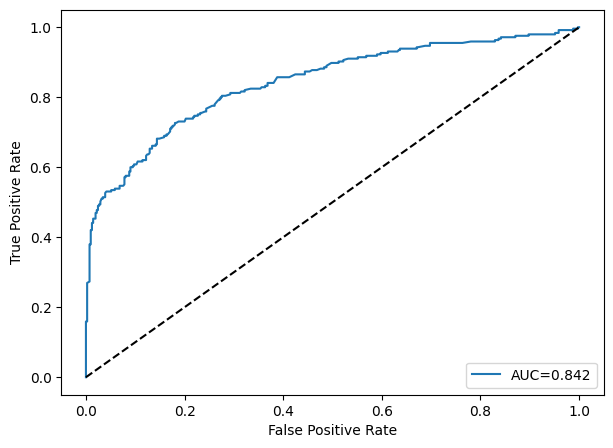

<Figure size 700x500 with 0 Axes>

In [50]:
auc = metrics.roc_auc_score(y_test, y_predada_proba)
auc = "{:.3f}".format(auc)
fprADA, tprADA, _ = metrics.roc_curve(y_test, y_predada_proba)
plt.plot(fprADA, tprADA, label="AUC="+ auc)
plt.plot([0,1],[0,1], 'k--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()
plt.savefig('img/adaboost.png')

In [51]:
print(classification_report(y_test, y_predada))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       410
           1       0.70      0.73      0.71       245

    accuracy                           0.78       655
   macro avg       0.77      0.77      0.77       655
weighted avg       0.78      0.78      0.78       655



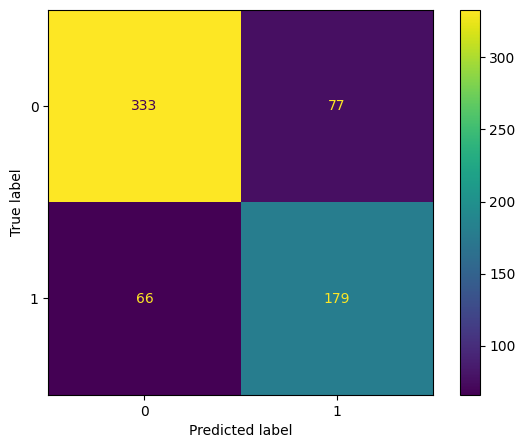

In [52]:
cm = confusion_matrix(y_test, y_predada)
mat = ConfusionMatrixDisplay(confusion_matrix=cm)
mat.plot()

In [53]:
kf = KFold(n_splits=5)

# We fuse the training and validation set together
X_trainval = np.concatenate((train_data, X_val))
y_trainval = np.concatenate((train_labels, y_val))

# Lists to save the losses
train_mses = []
val_mses = []

# loop through the different folds
for train_indexes, val_indexes in kf.split(X_trainval):
    # create an new linreg model, untrained
    model = LogisticRegression(max_iter = 10000)
    pipe = Pipeline([("preprocessor", RobustScaler()),('logReg', model)])
    # train the model on a subset of the training data
    pipe.fit(X_trainval[train_indexes], y_trainval[train_indexes])
    
    # make prediction for training and validation dataset
    y_hat_train_temp = pipe.predict(X_trainval[train_indexes])
    y_hat_val_temp = pipe.predict(X_trainval[val_indexes])
    
    # compute the losses
    mse_train_temp = np.mean((y_hat_train_temp - y_trainval[train_indexes]) ** 2)
    mse_val_temp = np.mean((y_hat_val_temp - y_trainval[val_indexes]) ** 2)
    
    # append the loss values to the lists
    train_mses.append(mse_train_temp)
    val_mses.append(mse_val_temp)
    
print(f"Mean training loss: {round(np.mean(train_mses), 3)} std: {round(np.std(train_mses), 3)}")
print(f"Mean validation loss: {round(np.mean(val_mses), 3)} std: {round(np.std(val_mses), 3)}")

Mean training loss: 0.225 std: 0.049
Mean validation loss: 0.387 std: 0.176


# Naives Bayes

In [54]:
gnb = GaussianNB()
pipe = Pipeline([("scaler", RobustScaler()),('gnb', gnb)])
pipe.fit(train_data, train_labels)
y_prednb = pipe.predict(X_test)
y_prednb_proba = pipe.predict_proba(X_test)[:,1]

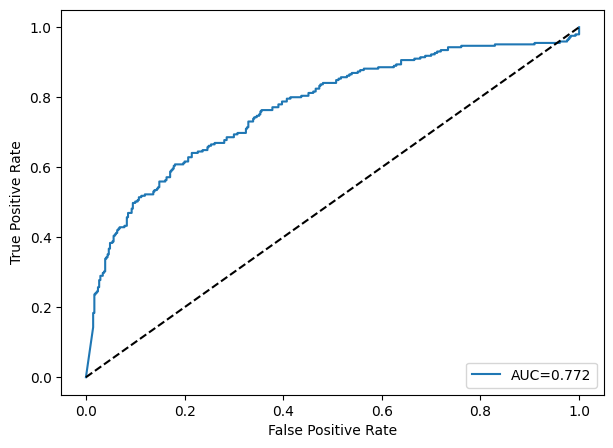

<Figure size 700x500 with 0 Axes>

In [55]:
auc = metrics.roc_auc_score(y_test, y_prednb_proba)
auc = "{:.3f}".format(auc)
fprNB, tprNB, _ = metrics.roc_curve(y_test, y_prednb_proba)
plt.plot(fprNB, tprNB, label="AUC="+ auc)
plt.plot([0,1],[0,1], 'k--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()
plt.savefig('img/naivebay.png')

In [56]:
print(classification_report(y_test, y_prednb, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.78      0.81      0.80       410
           1       0.66      0.61      0.63       245

    accuracy                           0.74       655
   macro avg       0.72      0.71      0.71       655
weighted avg       0.73      0.74      0.73       655



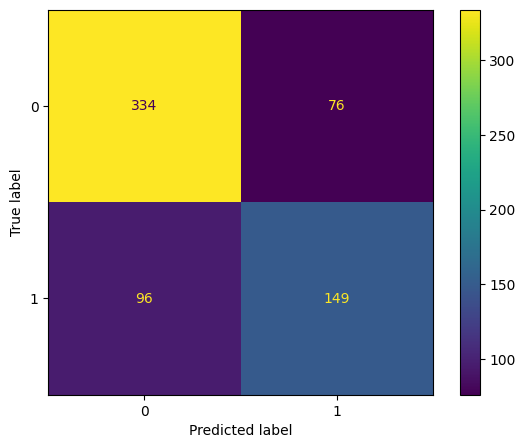

In [57]:
cm = confusion_matrix(y_test, y_prednb)
mat = ConfusionMatrixDisplay(confusion_matrix=cm)
mat.plot()

In [58]:
kf = KFold(n_splits=5)

# We fuse the training and validation set together
X_trainval = np.concatenate((train_data, X_val))
y_trainval = np.concatenate((train_labels, y_val))

# Lists to save the losses
train_mses = []
val_mses = []

# loop through the different folds
for train_indexes, val_indexes in kf.split(X_trainval):
    # create an new linreg model, untrained
    gnb = GaussianNB()
    pipe = Pipeline([("scaler", RobustScaler()),('gnb', gnb)])
    # train the model on a subset of the training data
    pipe.fit(X_trainval[train_indexes], y_trainval[train_indexes])
    
    # make prediction for training and validation dataset
    y_hat_train_temp = pipe.predict(X_trainval[train_indexes])
    y_hat_val_temp = pipe.predict(X_trainval[val_indexes])
    
    # compute the losses
    mse_train_temp = np.mean((y_hat_train_temp - y_trainval[train_indexes]) ** 2)
    mse_val_temp = np.mean((y_hat_val_temp - y_trainval[val_indexes]) ** 2)
    
    # append the loss values to the lists
    train_mses.append(mse_train_temp)
    val_mses.append(mse_val_temp)
    
print(f"Mean training loss: {round(np.mean(train_mses), 3)} std: {round(np.std(train_mses), 3)}")
print(f"Mean validation loss: {round(np.mean(val_mses), 3)} std: {round(np.std(val_mses), 3)}")

Mean training loss: 0.378 std: 0.019
Mean validation loss: 0.42 std: 0.1


# KNN

In [59]:
knn = KNeighborsClassifier(n_neighbors=25)

In [60]:
pipe = Pipeline([("scaler", RobustScaler()),('knn', knn)])
pipe.fit(train_data, train_labels)
y_predknn = pipe.predict(X_test)
y_predknn_proba = pipe.predict_proba(X_test)[:,1]

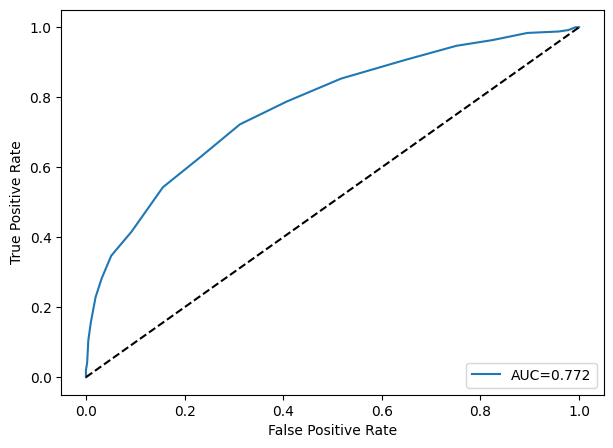

<Figure size 700x500 with 0 Axes>

In [61]:
auc = metrics.roc_auc_score(y_test, y_predknn_proba)
auc = "{:.3f}".format(auc)
fprKNN, tprKNN, _ = metrics.roc_curve(y_test, y_predknn_proba)
plt.plot(fprKNN, tprKNN, label="AUC="+ auc)
plt.plot([0,1],[0,1], 'k--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()
plt.savefig('img/knn.png')

In [62]:
print(classification_report(y_test, y_predknn, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.76      0.84      0.80       410
           1       0.68      0.54      0.60       245

    accuracy                           0.73       655
   macro avg       0.72      0.69      0.70       655
weighted avg       0.73      0.73      0.72       655



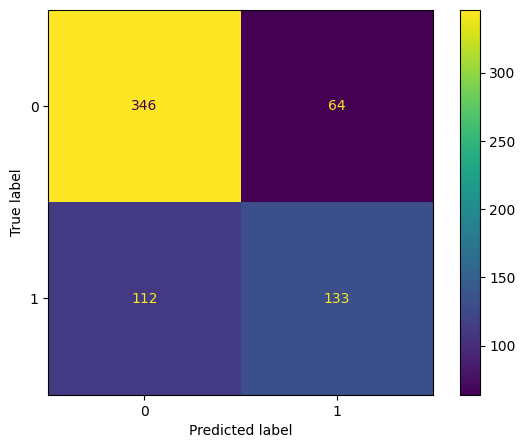

In [63]:
cm = confusion_matrix(y_test, y_predknn)
mat = ConfusionMatrixDisplay(confusion_matrix=cm)
mat.plot()

In [64]:
kf = KFold(n_splits=5)

# We fuse the training and validation set together
X_trainval = np.concatenate((train_data, X_val))
y_trainval = np.concatenate((train_labels, y_val))

# Lists to save the losses
train_mses = []
val_mses = []

# loop through the different folds
for train_indexes, val_indexes in kf.split(X_trainval):
    # create an new linreg model, untrained
    knn = KNeighborsClassifier(n_neighbors=25)
    pipe = Pipeline([("scaler", RobustScaler()),('knn', knn)])
    # train the model on a subset of the training data
    pipe.fit(X_trainval[train_indexes], y_trainval[train_indexes])
    
    # make prediction for training and validation dataset
    y_hat_train_temp = pipe.predict(X_trainval[train_indexes])
    y_hat_val_temp = pipe.predict(X_trainval[val_indexes])
    
    # compute the losses
    mse_train_temp = np.mean((y_hat_train_temp - y_trainval[train_indexes]) ** 2)
    mse_val_temp = np.mean((y_hat_val_temp - y_trainval[val_indexes]) ** 2)
    
    # append the loss values to the lists
    train_mses.append(mse_train_temp)
    val_mses.append(mse_val_temp)
    
print(f"Mean training loss: {round(np.mean(train_mses), 3)} std: {round(np.std(train_mses), 3)}")
print(f"Mean validation loss: {round(np.mean(val_mses), 3)} std: {round(np.std(val_mses), 3)}")

Mean training loss: 0.285 std: 0.03
Mean validation loss: 0.504 std: 0.192


# Random Forest

In [72]:
rf = RandomForestClassifier(n_estimators=30, random_state=42)

In [73]:
pipe = Pipeline([("scaler", StandardScaler()),('rf', rf)])
pipe.fit(train_data, train_labels)
y_predrf = pipe.predict(X_test)
y_predrf_proba = pipe.predict_proba(X_test)[:,1]

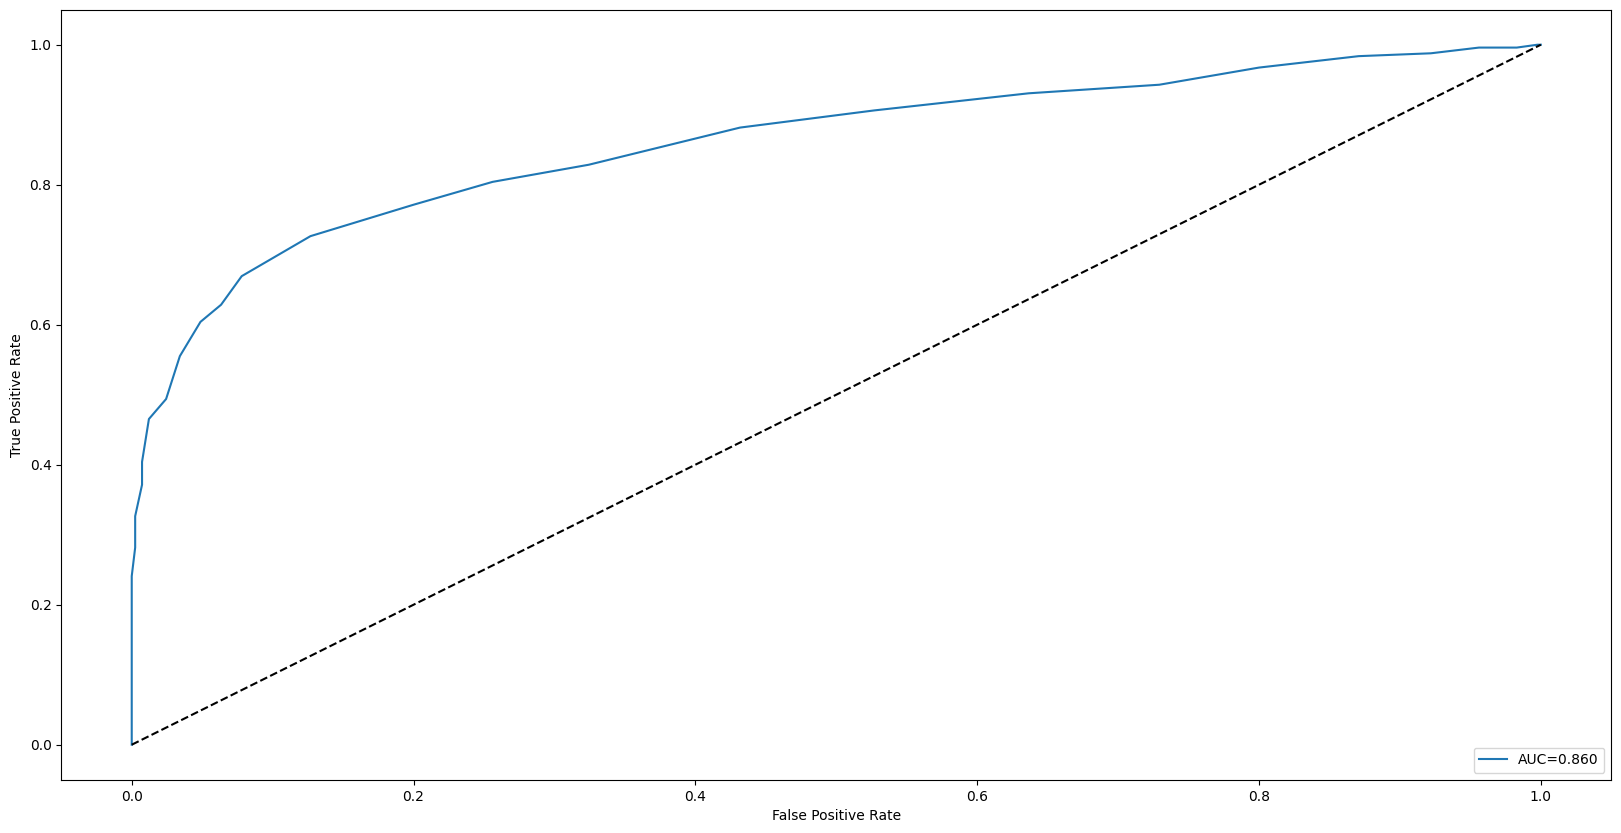

<Figure size 2000x1000 with 0 Axes>

In [74]:
auc = metrics.roc_auc_score(y_test, y_predrf_proba)
auc = "{:.3f}".format(auc)
fprRF, tprRF, _ = metrics.roc_curve(y_test, y_predrf_proba)
plt.plot(fprRF, tprRF, label="AUC="+ auc)
plt.plot([0,1],[0,1], 'k--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()
plt.savefig('img/randomfor.png')

In [75]:
print(classification_report(y_test, y_predrf, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       410
           1       0.84      0.67      0.74       245

    accuracy                           0.83       655
   macro avg       0.83      0.80      0.81       655
weighted avg       0.83      0.83      0.82       655



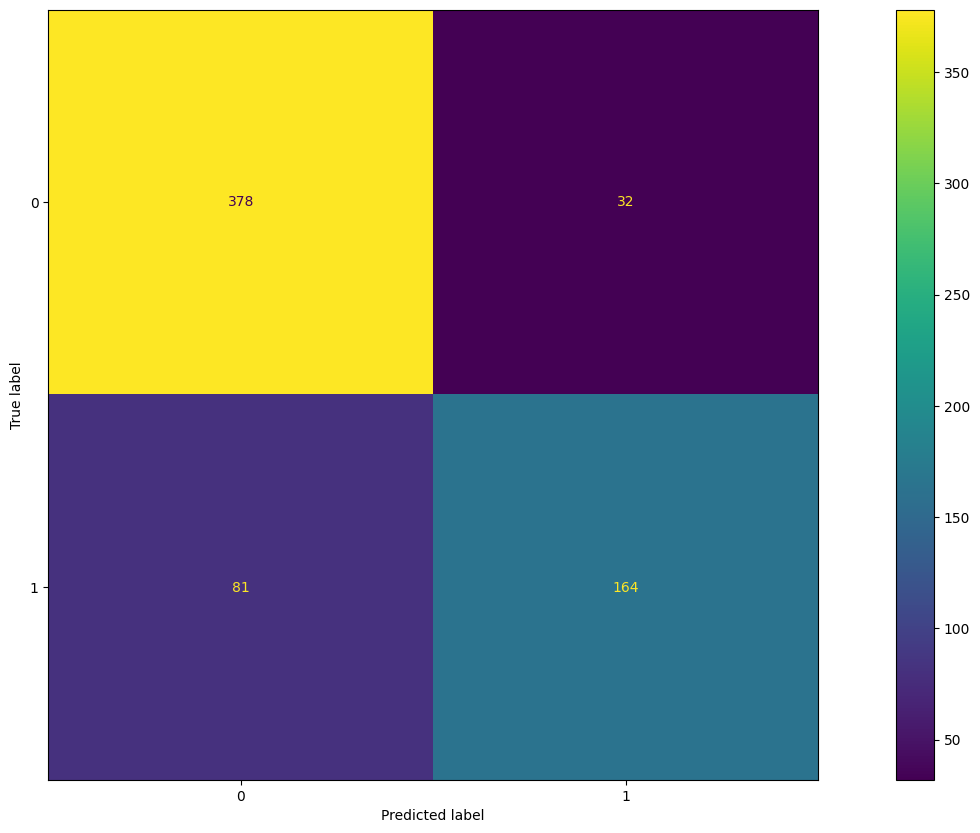

In [76]:
cm = confusion_matrix(y_test, y_predrf)
mat = ConfusionMatrixDisplay(confusion_matrix=cm)
mat.plot()

In [77]:
kf = KFold(n_splits=5)

# We fuse the training and validation set together
X_trainval = np.concatenate((train_data, X_val))
y_trainval = np.concatenate((train_labels, y_val))

# Lists to save the losses
train_mses = []
val_mses = []

# loop through the different folds
for train_indexes, val_indexes in kf.split(X_trainval):
    # create an new linreg model, untrained
    rf = RandomForestClassifier(n_estimators=50, random_state=42)
    pipe = Pipeline([("scaler", StandardScaler()),('rf', rf)])
    # train the model on a subset of the training data
    pipe.fit(X_trainval[train_indexes], y_trainval[train_indexes])
    
    # make prediction for training and validation dataset
    y_hat_train_temp = pipe.predict(X_trainval[train_indexes])
    y_hat_val_temp = pipe.predict(X_trainval[val_indexes])
    
    # compute the losses
    mse_train_temp = np.mean((y_hat_train_temp - y_trainval[train_indexes]) ** 2)
    mse_val_temp = np.mean((y_hat_val_temp - y_trainval[val_indexes]) ** 2)
    
    # append the loss values to the lists
    train_mses.append(mse_train_temp)
    val_mses.append(mse_val_temp)
    
print(f"Mean training loss: {round(np.mean(train_mses), 3)} std: {round(np.std(train_mses), 3)}")
print(f"Mean validation loss: {round(np.mean(val_mses), 3)} std: {round(np.std(val_mses), 3)}")

Mean training loss: 0.0 std: 0.0
Mean validation loss: 0.383 std: 0.174


# Benchmark

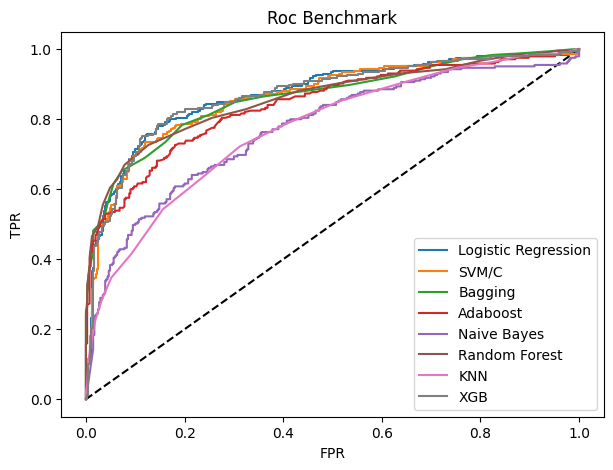

<Figure size 2000x1000 with 0 Axes>

In [71]:
plt.plot([0,1],[0,1], "k--")
plt.plot(fprLR, tprLR, label= "Logistic Regression")
plt.plot(fprSVC, tprSVC, label= "SVM/C")
plt.plot(fprBAGGING, tprBAGGING, label= "Bagging")
plt.plot(fprADA, tprADA, label= "Adaboost")
plt.plot(fprNB, tprNB, label= "Naive Bayes")
plt.plot(fprRF, tprRF, label= "Random Forest")
plt.plot(fprKNN, tprKNN, label= "KNN")
plt.plot(fprXGB, tprXGB, label= "XGB")

plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('Roc Benchmark')
plt.rcParams["figure.figsize"] = (20,10)
plt.show()
plt.savefig('img/bench.png')